In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the drone image
drone_image = cv2.imread('E:\FYP\code\images\img1.jpg')

In [3]:
# Preprocessing: Convert to grayscale and enhance contrast if needed
gray_image = cv2.cvtColor(drone_image, cv2.COLOR_BGR2GRAY)

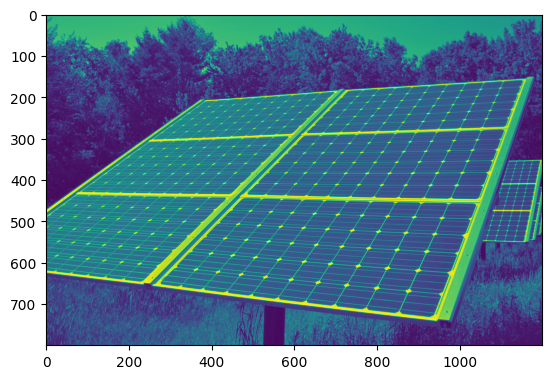

In [5]:
plt.imshow(gray_image)

In [8]:
# Segmentation: Apply thresholding to isolate the solar plate
#The function applies fixed-level thresholding to a multiple-channel array. The function is typically
# .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
# .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
# .   values. There are several types of thresholding supported by the function. They are determined by
# .   type parameter.
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

In [11]:
print(binary_image,binary_image.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (800, 1200)


In [13]:
print(binary_image[0])

[0 0 0 ... 0 0 0]


In [24]:
contours?

Type:        tuple
String form:
(array([[[595, 799]]], dtype=int32), array([[[459, 799]],
           
           [[460, 799]]], dtype=int32), ar <...> ]],
           
           ...,
           
           [[848,   6]],
           
           [[847,   5]],
           
           [[847,   0]]], dtype=int32))
Length:      821
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.

In [14]:

# Find contours of the solar plate
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [47]:
cv2.RETR_EXTERNAL?

Type:        int
String form: 0
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4

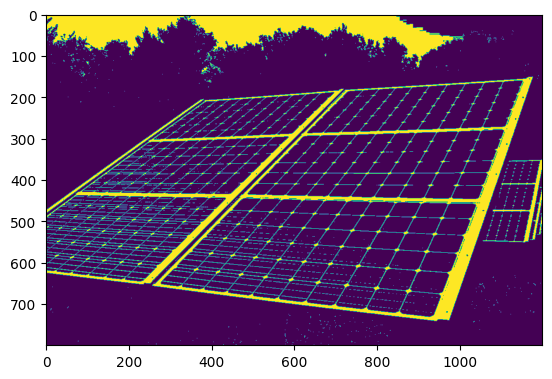

In [25]:
plt.imshow(binary_image)

In [15]:
contours

(array([[[595, 799]]], dtype=int32),
 array([[[459, 799]],
 
        [[460, 799]]], dtype=int32),
 array([[[805, 798]]], dtype=int32),
 array([[[683, 798]]], dtype=int32),
 array([[[648, 798]]], dtype=int32),
 array([[[429, 798]],
 
        [[429, 799]]], dtype=int32),
 array([[[579, 797]]], dtype=int32),
 array([[[266, 797]],
 
        [[267, 797]]], dtype=int32),
 array([[[665, 795]]], dtype=int32),
 array([[[747, 794]]], dtype=int32),
 array([[[597, 793]],
 
        [[597, 794]]], dtype=int32),
 array([[[584, 793]],
 
        [[584, 794]]], dtype=int32),
 array([[[469, 793]],
 
        [[470, 793]]], dtype=int32),
 array([[[453, 793]],
 
        [[453, 794]]], dtype=int32),
 array([[[247, 793]]], dtype=int32),
 array([[[628, 792]]], dtype=int32),
 array([[[405, 792]]], dtype=int32),
 array([[[803, 791]]], dtype=int32),
 array([[[580, 791]]], dtype=int32),
 array([[[473, 791]]], dtype=int32),
 array([[[739, 790]],
 
        [[739, 792]],
 
        [[740, 792]],
 
        [[740, 791]]

In [23]:
contours[0][0][0]

array([595, 799], dtype=int32)

In [17]:
# Iterate through contours and find the contour with maximum area (assuming it's the solar plate)
max_contour = max(contours, key=cv2.contourArea)

In [46]:
max_contour[0,0]

array([1177,  151], dtype=int32)

In [19]:
max_contour[0]

array([[1177,  151]], dtype=int32)

In [26]:
# Create a mask for the solar plate
mask = np.zeros_like(gray_image)
cv2.drawContours(mask, [max_contour], -1, (255), thickness=cv2.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


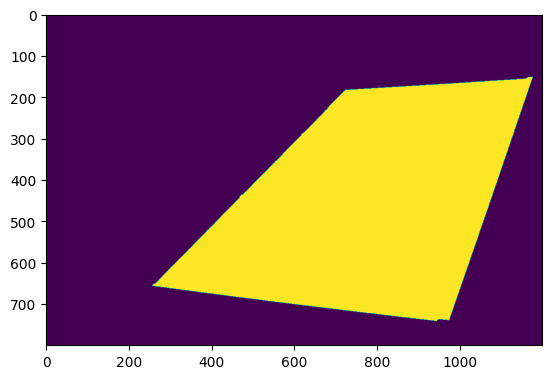

In [37]:
print(mask)
plt.imshow(mask)

In [29]:
# Apply the mask to extract the solar plate region
solar_plate_image = cv2.bitwise_and(gray_image, mask)

In [30]:
# Feature Extraction: Get thermal values from the solar plate region
thermal_values = solar_plate_image[mask > 0]

In [31]:
thermal_values

array([154, 158, 161, ..., 195, 218, 170], dtype=uint8)

In [35]:

# Now you have the thermal values of the solar plate in the 'thermal_values' array

# Optional: Display the result
# cv2.imshow('Solar Plate', solar_plate_image)
print(thermal_values)
thermal_list_of_panels = np.array(thermal_values)
print(thermal_list_of_panels)


[154 158 161 ... 195 218 170]
[154 158 161 ... 195 218 170]


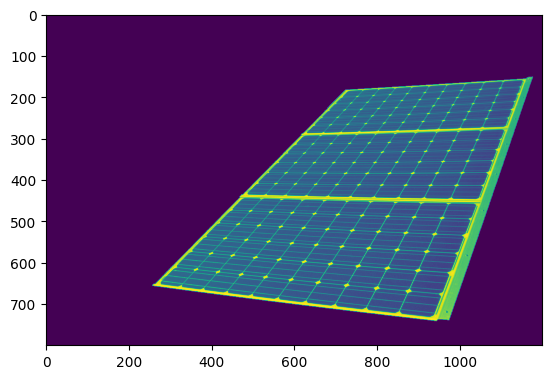

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [36]:
plt.imshow(solar_plate_image)

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()